# Task 1: YouTube Streamer Analysis

#### Dataset : Top 1000 Youtubers statistics
#### Description: This dataset contains valuableinformation about the top YouTube streamers,including their ranking, categories, subscribers,country, visits, likes, comments, and more.Your task is to perform a comprehensiveanalysis of the dataset to extract insightsabout the top YouTube content creators.

# Import Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

# Import Dataset 

In [173]:
YouTube_df = pd.read_csv("youtubers_df.csv")

# Data Exploration

In [174]:
YouTube_df.shape

(1000, 9)

In [175]:
YouTube_df.head(5)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [176]:
YouTube_df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [177]:
YouTube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [178]:
# Key Variables
YouTube_df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [179]:
#Summary statistics
YouTube_df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [180]:
#Checks for any missing data
YouTube_df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [181]:
# Replace the null values
YouTube_df['Categories'].fillna('Unknown', inplace=True)

In [182]:
YouTube_df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

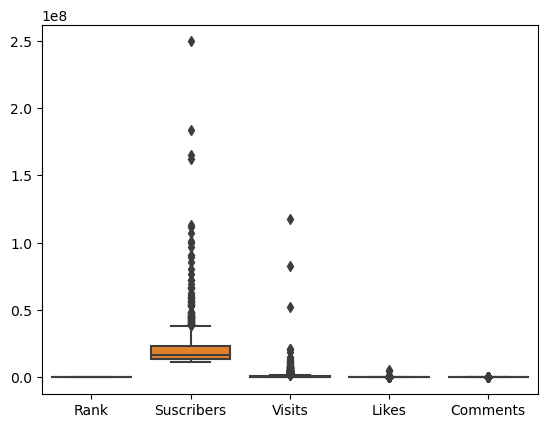

In [183]:
# Checks for any outliers
sns.boxplot(data=YouTube_df)
plt.show()

##### Remove outliers

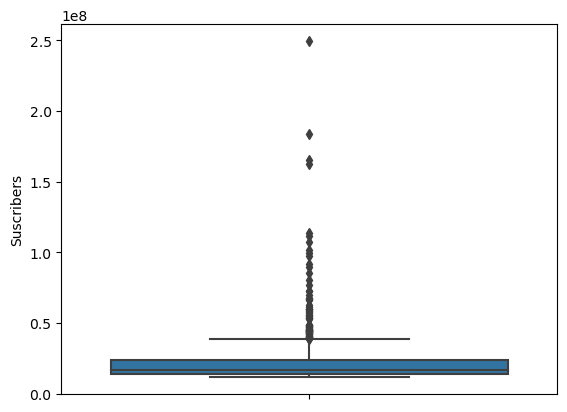

In [184]:
sns.boxplot(y=YouTube_df['Suscribers'])
plt.show()

In [185]:
Q1 = YouTube_df['Suscribers'].quantile(0.25)
Q3 = YouTube_df['Suscribers'].quantile(0.75)
IQR = Q3 - Q1

In [186]:
IQR

9900000.0

9900000.0


<function matplotlib.pyplot.show(close=None, block=None)>

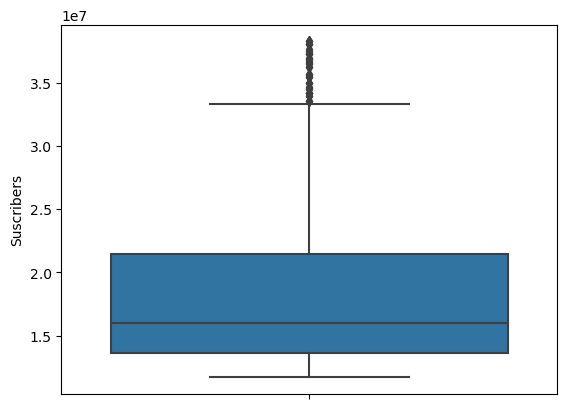

In [187]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

df_cleaned = YouTube_df[(YouTube_df['Suscribers'] >= lower_bound) & (YouTube_df['Suscribers'] <= upper_bound)]


sns.boxplot(y=df_cleaned['Suscribers'])
plt.show

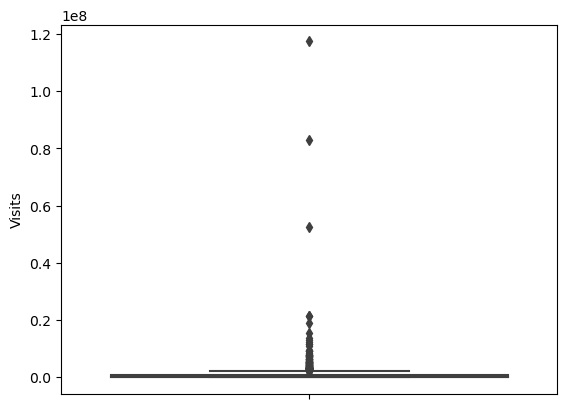

In [188]:
sns.boxplot(y=YouTube_df['Visits'])
plt.show()

In [189]:
Q1 = YouTube_df['Visits'].quantile(0.25)
Q3 = YouTube_df['Visits'].quantile(0.75)
IQR = Q3 - Q1

In [190]:
IQR

833500.0

833500.0


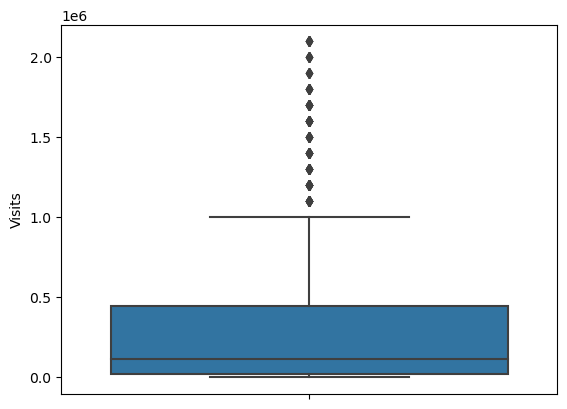

In [191]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

df_cleaned = YouTube_df[(YouTube_df['Visits'] >= lower_bound) & (YouTube_df['Visits'] <= upper_bound)]


sns.boxplot(y=df_cleaned['Visits'])
plt.show()

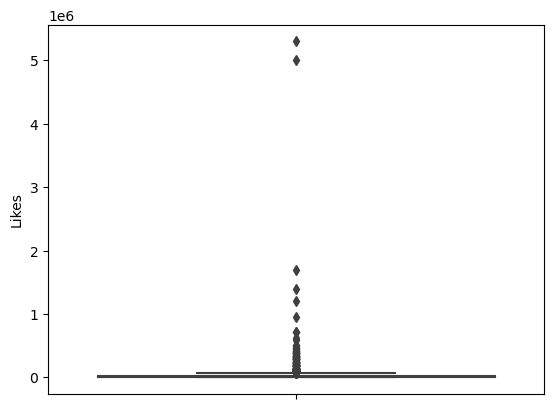

In [192]:
sns.boxplot(y=YouTube_df['Likes'])
plt.show()

In [193]:
Q1 = YouTube_df['Likes'].quantile(0.25)
Q3 = YouTube_df['Likes'].quantile(0.75)
IQR = Q3 - Q1

In [194]:
IQR

28178.25

28178.25


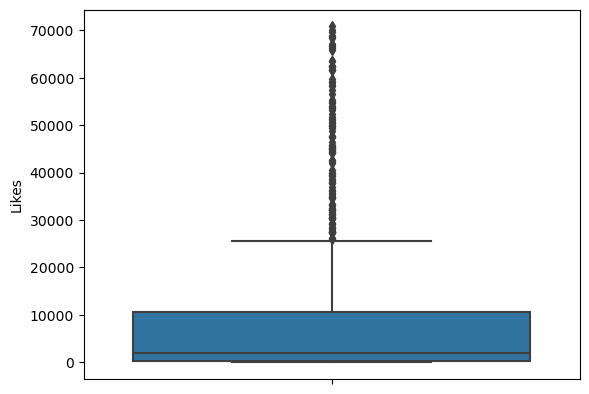

In [195]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

df_cleaned = YouTube_df[(YouTube_df['Likes'] >= lower_bound) & (YouTube_df['Likes'] <= upper_bound)]


sns.boxplot(y=df_cleaned['Likes'])
plt.show()

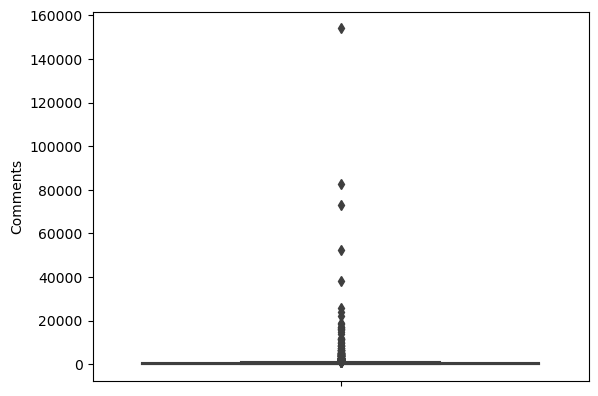

In [196]:
sns.boxplot(y=YouTube_df['Comments'])
plt.show()

In [197]:
Q1 = YouTube_df['Comments'].quantile(0.25)
Q3 = YouTube_df['Comments'].quantile(0.75)
IQR = Q3 - Q1

In [198]:
IQR

470.0

470.0


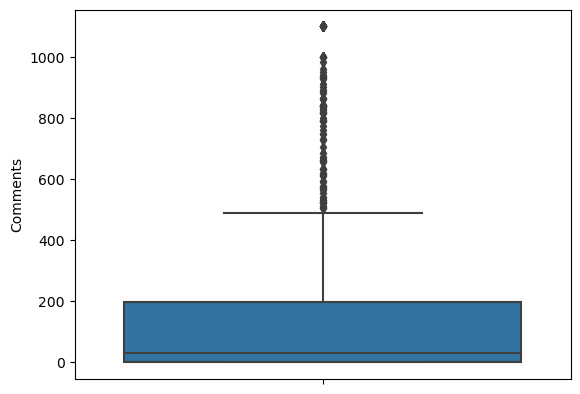

In [199]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

df_cleaned = YouTube_df[(YouTube_df['Comments'] >= lower_bound) & (YouTube_df['Comments'] <= upper_bound)]


sns.boxplot(y=df_cleaned['Comments'])
plt.show()

# Trend Analysis

In [200]:
#Top Categories
top_category = YouTube_df['Categories'].value_counts()

In [201]:
top_category

Categories
Unknown                               306
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor  

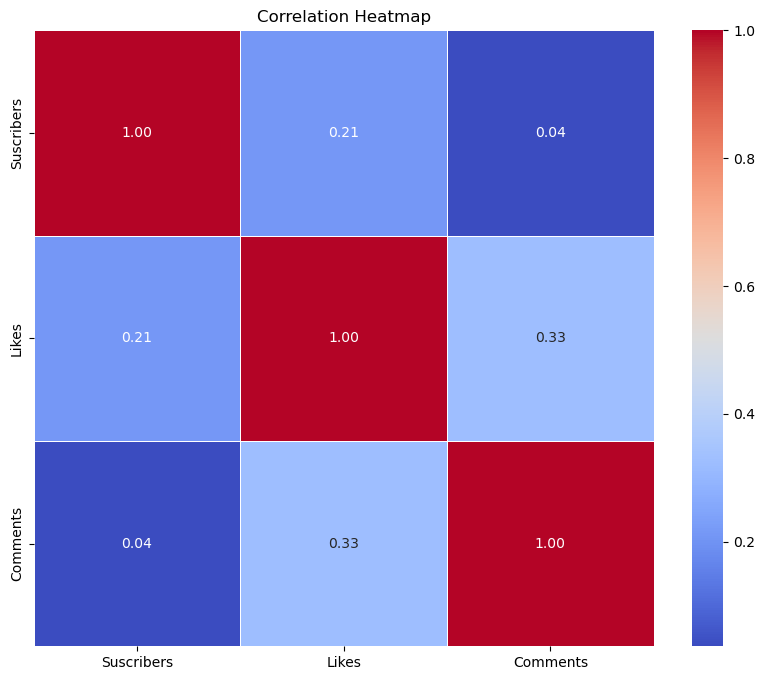

In [202]:
#Correlation analysis between number of subscribers and number of likes or comments
correlation_heatmap = YouTube_df[['Suscribers','Likes', 'Comments']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [203]:
#Audience distribution by country
country_distribution = YouTube_df['Country'].value_counts()

In [204]:
country_distribution

Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: count, dtype: int64

# Performance Metrics

In [205]:
average_subscribers = YouTube_df['Suscribers'].mean()
average_visits = YouTube_df['Visits'].mean()
average_likes = YouTube_df['Likes'].mean()
average_comments = YouTube_df['Comments'].mean()

print('Average Metrics:')
print(f'Average Subscribers: {round(average_subscribers,2)}')
print(f'Average Visits: {round(average_visits,2)}')
print(f'Average Likes: {round(average_likes,2)}')
print(f'Average Comments: {round(average_comments,2)}')

Average Metrics:
Average Subscribers: 21894400.0
Average Visits: 1209446.32
Average Likes: 53632.59
Average Comments: 1288.77


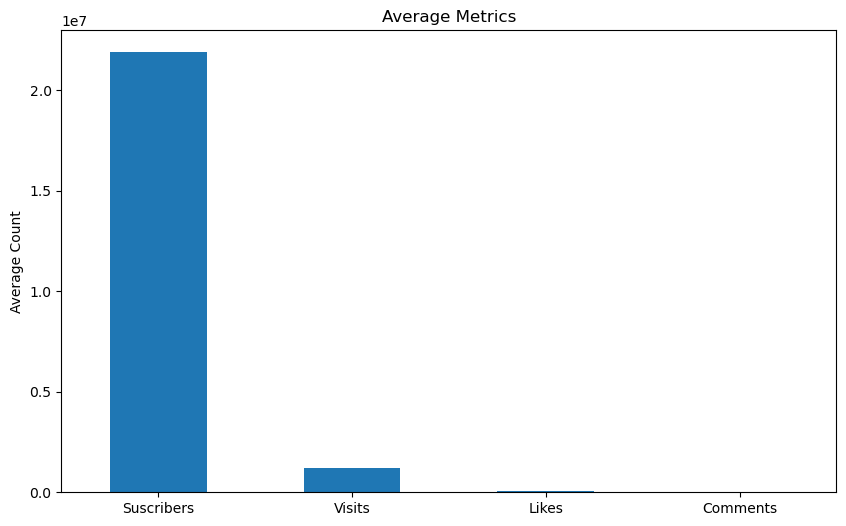

In [206]:
average_metrics = YouTube_df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

plt.figure(figsize=(10, 6))
average_metrics.plot(kind='bar')
plt.title('Average Metrics')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.show()

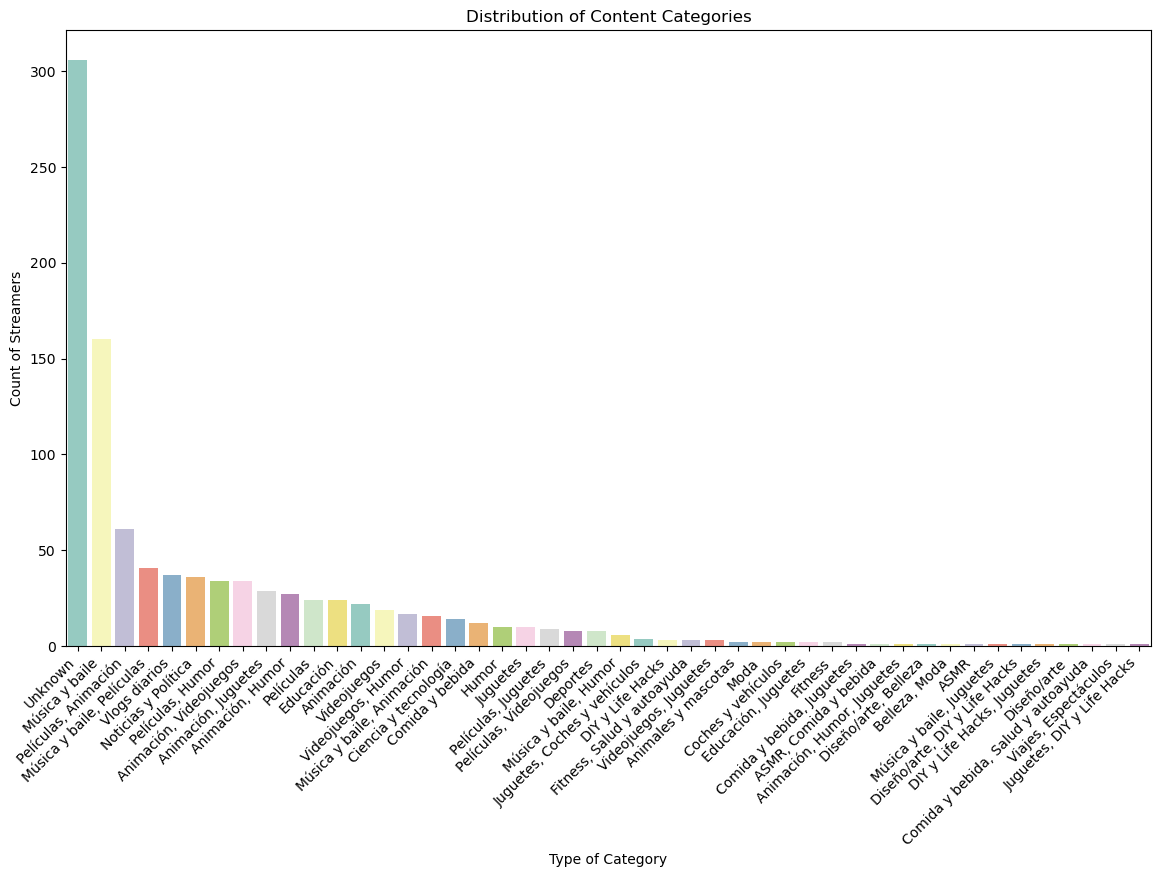

In [207]:
# Visualisation of the distribution of content categories
plt.figure(figsize=(14, 8))
sns.countplot(x='Categories', data=YouTube_df, order=YouTube_df['Categories'].value_counts().index, palette='Set3')
plt.title('Distribution of Content Categories')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Type of Category')
plt.ylabel('Count of Streamers')
plt.show()

# Content Recommendations

##### Content-based Filtering algorithm makes recommendations based on how similar the features of an item are to other items. 

###### Implementation

In [208]:
YouTube_df['recommendation_tag'] = (pd.Series(YouTube_df[['Username','Categories']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

titles = YouTube_df['Username']
indices = pd.Series(YouTube_df.index, index=YouTube_df['Username'])

In [209]:
YouTube_df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,recommendation_tag
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,tseries Música y baile
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,"MrBeast Videojuegos, Humor"
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,CoComelon Educación
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,SETIndia Unknown
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,"KidsDianaShow Animación, Juguetes"


In [210]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')

tf_recommendationTag_matrix = tf.fit_transform(YouTube_df['recommendation_tag'])

In [211]:
cosine_sim_recommendationTag = cosine_similarity(tf_recommendationTag_matrix, 
                                        tf_recommendationTag_matrix)
print(cosine_sim_recommendationTag.shape)

(1000, 1000)


In [212]:
cosine_sim_recommendationTag[:5]

array([[1.        , 0.        , 0.        , ..., 0.15182848, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04372015,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Top-N Recommendations
With the content similarity matrix computed now able to generate recommendations. 

Generate a top-N list of users similar to one which the system is prompt with.

In [213]:
# Generates top N recommendations for a given username using content-based filtering
def content_generate_top_N_recommendations(title, N=10):
    v_idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_recommendationTag[v_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:N]
    video_indices = [i[0] for i in sim_scores]

    return titles.iloc[video_indices]

In [214]:
content_generate_top_N_recommendations('MrBeast',  N=10)

179     brentrivera
219       PrestonYT
234             rug
278     StokesTwins
285      BenAzelart
304        infinite
343      IShowSpeed
376         Sidemen
467    TheBrianMaps
Name: Username, dtype: object

In [215]:
content_generate_top_N_recommendations('BLACKPINK', N=10)

947         HiTechIslamic
953         HiTechIslamic
0                 tseries
8         zeemusiccompany
14                    BTS
15             HYBELABELS
19              KondZilla
21             filmigaane
22     TSeriesBhaktiSagar
Name: Username, dtype: object

In [216]:
content_generate_top_N_recommendations("CoComelon",N=10)

32         infobellshindirhymes
157        infobellstamilrhymes
159       infobellstelugurhymes
306    khangsresearchcentre1685
316               MrVivekBindra
318                  kurzgesagt
323              KiddiestvHindi
331    -genevievesplayhouse1465
463                  zappytoons
Name: Username, dtype: object